In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.image as mpimg
import numpy as np
import math
import os
import scipy

In [2]:
def load_pointset(path: str) -> ([], []):
    xs = []
    ys = []
    
    with open(path, 'r') as points_file:
        for line in points_file.readlines()[1:]:
            x, y = line.split(" ")
            y.replace("\n", "")
            
            xs.append(float(x))
            ys.append(float(y))
    return (xs, ys)

In [3]:
def load_spectrum_to_matrix(freqpath: str) -> np.ndarray:
    minfreq = 1.0e36
    maxfreq = 0.0
    
    freqs = []
    
    with open(freqpath, 'r') as spectrum:
        dimension = int(spectrum.readline())
        for line in spectrum.readlines():
            freqs.append(float(line))
            minfreq = min(float(line), minfreq)
            maxfreq = max(float(line), maxfreq)
    
    matrix = np.zeros((dimension, dimension))
    
    for row in range(dimension):
        for col in range(dimension):
            frequency = freqs[row * dimension + col]
            # normalize
            #frequency = (frequency - minfreq) / (maxfreq - minfreq)
            frequency = math.sqrt(frequency / maxfreq);
            matrix[row][col] = frequency
    return matrix

In [4]:
def load_pcf(pcfpath: str) -> ([],[]):
    xs = []
    ys = []
    with open(pcfpath, 'r') as pcffile:
        for line in pcffile.readlines():
            ys.append(float(line))
    xs = range(len(ys))

    return (xs, ys)

In [5]:
def load_radspec(specpath: str) -> ([], []):
    xs = []
    ys = []

    with open(specpath, 'r') as specfile:
        for line in specfile.readlines():
            x, y = line.split(", ")
            xs.append(float(x))
            ys.append(float(y))
    return (xs, ys)

In [6]:
def load_pcfseries(folderpath):
    pcffiles = os.listdir(folderpath)
    values = {}

    for  pcffilename in pcffiles:
        cutoff = pcffilename.split("_")[1].split('.txt')[0]
        values[cutoff] = load_pcf(os.path.join(folderpath, pcffilename))


    return values

In [7]:
def load_heck_pcf(filepath):
    xs = []
    ys = []

    with open(filepath, 'r') as specfile:
        for line in specfile.readlines():
            x, y = line.split(" ")
            xs.append(float(x))
            ys.append(float(y))
    return (xs, ys)

In [8]:
def load_heck_pcfseries(folderpath):
    pcffiles = os.listdir(folderpath)
    values = {}

    for pcffilename in pcffiles:
        filename, file_extension = os.path.splitext(os.path.join(folderpath, pcffilename))
        if file_extension != ".txt":
            continue
        cutoff = pcffilename.split("_")[1].split('.txt')[0]
        values[cutoff] = load_heck_pcf(os.path.join(folderpath, pcffilename))


    return values

In [9]:
def load_utk_rdfseries(folderpath):
    rdffiles = os.listdir(folderpath)
    values = {}

    for rdffilename in rdffiles:
        filename, file_extension = os.path.splitext(os.path.join(folderpath, rdffilename))
        if file_extension != ".txt":
            continue
        cutoff = rdffilename.split("_")[1].split('.txt')[0]
        values[cutoff] = load_radspec(os.path.join(folderpath, rdffilename))


    return values

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '3840x2880', '-pix_fmt', 'rgba', '-framerate', '3.3333333333333335', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'animation_UTK_Heck.mp4']' returned non-zero exit status 255.

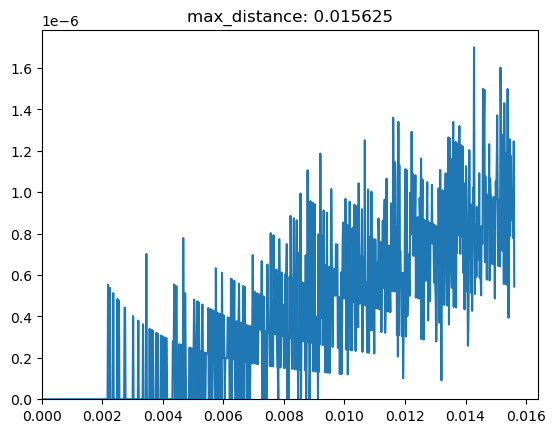

In [10]:
from matplotlib import animation

functions = load_utk_rdfseries("../result_data/rdffiles_Heck_UTK/")

keys = sorted(functions.keys())

fig, ax = plt.subplots()

plot = ax.plot(functions[keys[0]][0], functions[keys[0]][1])[0]
ax.set(xlim=[0, 0.02], ylim=[-0.1, 0.1])

def update(frame):
    # determine maximum for plot scaling
    maxx = max(functions[keys[frame]][0])
    maxy = max(functions[keys[frame]][1])
    
    ax.set(xlim=[0, maxx * 1.05], ylim=[0, maxy * 1.05])
    ax.set_title("max_distance: " + keys[frame])
    plot.set_xdata(functions[keys[frame]][0])
    plot.set_ydata(functions[keys[frame]][1])

anim = animation.FuncAnimation(fig=fig, func=update, frames=len(keys), interval=300)
anim.save("animation_UTK_Heck.mp4", dpi=600)

In [17]:
# Plotting of compound animation
from matplotlib import animation

LINEWIDTH = 0.6

utk_rdfdata = load_utk_rdfseries("../result_data/rdffiles_Heck_UTK/")
psa_rdfdata = load_heck_pcfseries("../result_data/pcffiles_PSA/")
utk_pcfdata = load_pcfseries("../result_data/pcffiles_UTK/")

utk_rdf_keys = sorted(utk_rdfdata.keys())
psa_keys = sorted(psa_rdfdata.keys())
utk_pcf_keys = sorted(utk_pcfdata.keys())

assert utk_rdf_keys == psa_keys == utk_pcf_keys

fig, ax = plt.subplots(2,2, sharex=False, sharey=False)
fig.tight_layout()

plot_utk_rdf = ax[0][0].plot(utk_rdfdata[utk_rdf_keys[0]][0], utk_rdfdata[utk_rdf_keys[0]][1], linewidth=LINEWIDTH)[0]
ax[0][0].set(xlim=[0, 0.02], ylim=[-0.1, 0.1])

plot_psa_rdf = ax[0][1].plot(psa_rdfdata[psa_keys[0]][0], psa_rdfdata[psa_keys[0]][1], linewidth=LINEWIDTH)[0]
ax[0][1].set(xlim=[0, 0.02], ylim=[-0.1, 0.1])

plot_utk_pcf = ax[1][0].plot(utk_pcfdata[utk_pcf_keys[0]][0], utk_pcfdata[utk_pcf_keys[0]][1], linewidth=LINEWIDTH)[0]
ax[1][0].set(xlim=[0, 0.02], ylim=[-0.1, 0.1])

ax[1][1].set_axis_off()
ax[1][1].set(xlim=[0, 1.0], ylim=[0, 1.0])
ax[1][1].text(0.4, 0.4, "max_distance: \n" + utk_pcf_keys[0])

def update(frame):
    # determine maximum for plot scaling
    maxx_0 = max(utk_rdfdata[utk_rdf_keys[frame]][0])
    maxy_0 = max(utk_rdfdata[utk_rdf_keys[frame]][1])

    maxx_1 = max(psa_rdfdata[psa_keys[frame]][0])
    maxy_1 = max(psa_rdfdata[psa_keys[frame]][1])

    maxx_2 = max(utk_pcfdata[utk_pcf_keys[frame]][0])
    maxy_2 = max(utk_pcfdata[utk_pcf_keys[frame]][1])
    
    ax[0][0].set(xlim=[0, maxx_0 * 1.05], ylim=[0, maxy_0 * 1.05])
    ax[0][0].set_title("Heck in UTK")
    
    plot_utk_rdf.set_xdata(utk_rdfdata[utk_rdf_keys[frame]][0])
    plot_utk_rdf.set_ydata(utk_rdfdata[utk_rdf_keys[frame]][1])

    ################
    
    ax[0][1].set(xlim=[0, maxx_1 * 1.05], ylim=[0, maxy_1 * 1.05])
    ax[0][1].set_title("PSA implementation")
    
    plot_psa_rdf.set_xdata(psa_rdfdata[psa_keys[frame]][0])
    plot_psa_rdf.set_ydata(psa_rdfdata[psa_keys[frame]][1])

    ################    
    
    ax[1][0].set(xlim=[0, maxx_2 * 1.05], ylim=[0, maxy_2 * 1.05])
    ax[1][0].set_title("UTK implementation")
    
    plot_utk_pcf.set_xdata(utk_pcfdata[utk_pcf_keys[frame]][0])
    plot_utk_pcf.set_ydata(utk_pcfdata[utk_pcf_keys[frame]][1])

    ################
    ax[1][1].clear()
    ax[1][1].set_axis_off()
    ax[1][1].set(xlim=[0, 1.0], ylim=[0, 1.0])
    ax[1][1].text(0.4, 0.4, "max_distance: \n" + utk_pcf_keys[frame])

maxkeylen = max(max(len(utk_rdf_keys), len(psa_keys)), len(utk_pcf_keys))

anim = animation.FuncAnimation(fig=fig, func=update, frames=maxkeylen, interval=300)
anim.save("animation_compound.mp4", dpi=600, writer="ffmpeg")

NameError: name 'load_utk_rdfseries' is not defined

In [19]:

spectrum = load_spectrum_to_matrix("../cmake-build-debug/spectrum.txt")

(px, py) = load_pointset("../result_data/sampled.txt")

(pcfx, pcfy) = load_heck_pcf("../psa/cmake-build-debug/sampled_rdf.txt")

(specxs, specys) = load_radspec("../cmake-build-debug/radSpec.txt")

fig, ax = plt.subplots(2, 2)
fig.tight_layout() 
plt.rcParams['figure.dpi'] = 800


ax[0][0].set_aspect(1.0)
ax[0][0].scatter(px, py, s=0.2)
ax[0][0].set_title("Points")

ax[0][1].imshow(spectrum, cmap="gray")
ax[0][1].set_title("Spectrum")

ax[1][0].plot(pcfx, pcfy, linewidth=0.5)
ax[1][0].set_title("PCF")

ax[1][1].plot(specxs, specys, linewidth=0.5)
ax[1][1].set_title("Power spectrum")
plt.savefig("fullfig_generated_utk.png", dpi=800)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../cmake-build-debug/spectrum.txt'

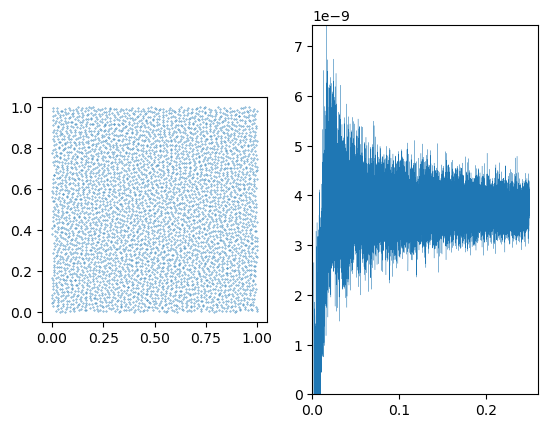

In [12]:
fig, ax = plt.subplots(1,2)
ax[0].set_aspect(1)
#ax[1].set_aspect(1.0)

pointset = load_pointset("../utk/cmake-build-debug/src/samplers/points.txt")
ax[0].scatter(pointset[0], pointset[1], s=0.1)

rdf = load_radspec("../utk/cmake-build-debug/src/samplers/rdf.txt")
ax[1].set(xlim=[0.0, 0.26], ylim=[min(rdf[1]), max(rdf[1])])
ax[1].plot(rdf[0], rdf[1], linewidth = 0.2)

plt.rcParams['figure.dpi'] = 400
plt.show()

In [45]:
import os
import matplotlib.pyplot as plt
from matplotlib import animation


def generate_forceseries(path: str):
    forces = []
    for i in range(len(os.listdir(path))):
        with open(os.path.join(path, "force" + str(i) + ".dat"), 'r') as forcefile:
            xs = []
            ys = []
            for line in forcefile.readlines():
                x, y = line.split(" ")
                y.replace("\n", "")
                xs.append(float(x))
                ys.append(float(y))
        forces.append((xs, ys)) 
    return forces

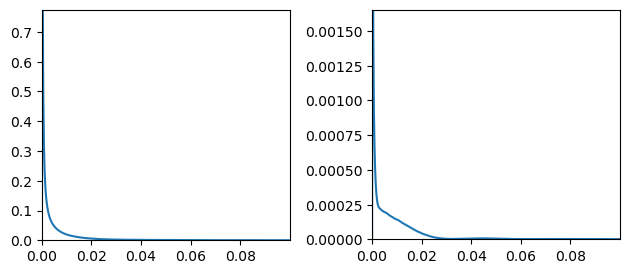

In [106]:
forces = generate_forceseries("../result_data/forces_unmodified")

fig, ax = plt.subplots(1,2)


def update(frame, n):
    maxx = max(forces[frame][0])
    maxy = max(forces[frame][1])

    ax[n].clear()
    ax[n].set(xlim=[0.0, maxx * 0.2], ylim=[0.0, maxy * 0.2])
    #ax.set_title("frame " + str(frame))
    ax[n].plot(forces[frame][0],forces[frame][1])

update(len(forces) - 1, 1)
update(0, 0)

ax[0].set_aspect(0.12)
ax[1].set_aspect(56)

fig.tight_layout()


plt.savefig("/home/clara/repositorys/bachelor-thesis/thesis/media/f_converged_non_converged.png", dpi=300, bbox_inches='tight')
    
#anim = animation.FuncAnimation(fig=fig, func=update, frames=len(forces), interval=300)
#anim.save("animation_forces_16384.mp4", dpi=600, writer="ffmpeg")

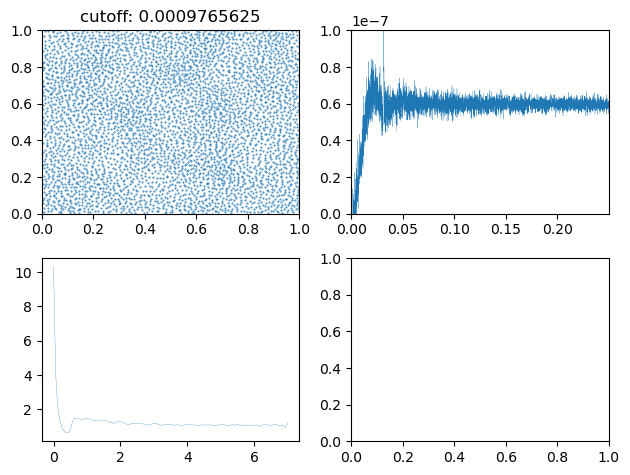

In [18]:
def load_pointset_series(path: str):
    pointsets = {}
    for pointset in os.listdir(path):
        key = float(pointset.replace("pointset_", "").replace(".txt", ""))
        pointset = load_pointset(os.path.join(path, pointset))
        pointsets[key] = pointset

    return pointsets

def load_radspec_series(path: str):
    radspecs = {}
    for radspec in os.listdir(path):
        key = float(radspec.replace("pointset_", "").replace(".rdf", ""))
        radspec = load_radspec(os.path.join(path, radspec))
        radspecs[key] = radspec

    return radspecs
        

pcfs = load_utk_rdfseries("../result_data/pointset_series/rdffiles/")
pointsets = load_pointset_series("../result_data/pointset_series/pointsets/")
radspecs = load_radspec_series("../result_data/pointset_series/radspecs/")

keys = sorted(pointsets.keys())

fig, ax = plt.subplots(2,2)
pointplot = ax[0][0].scatter(pointsets[keys[0]][0], pointsets[keys[0]][1], s=0.2)
rdfplot = ax[0][1].plot(pcfs[str(keys[0])][0],pcfs[str(keys[0])][1], linewidth=0.2)[0]
radspecplot = ax[1][0].plot(radspecs[keys[0]][0], radspecs[keys[0]][1], linewidth=0.2)[0]

fig.tight_layout()


def update(frame):

    ax[0][0].clear()
    pointplot = ax[0][0].scatter(pointsets[keys[frame]][0], pointsets[keys[frame]][1], s=0.2)
    ax[0][0].set(xlim=[0, 1], ylim=[0.0, 1.0])
    ax[0][0].set_title("cutoff: " + str(keys[frame]))

    maxx = float(max(pcfs[str(keys[frame])][0]))
    maxy = float(max(pcfs[str(keys[frame])][1]))
    
    rdfplot.set_xdata(pcfs[str(keys[frame])][0])
    rdfplot.set_ydata(pcfs[str(keys[frame])][1])

    ax[0][1].set(xlim=[0, maxx], ylim=[0.0, 1.0e-7])
    #ax[1].set_xbound(lower=-0.01, upper=maxx) 
    #ax[1].set_ybound(lower=0, upper=maxx)

    radspecplot.set_xdata(radspecs[keys[frame]][0])
    radspecplot.set_ydata(radspecs[keys[frame]][1])


anim = animation.FuncAnimation(fig=fig, func=update, frames=len(keys), interval=300)
anim.save("animation_cutoffs_with_radspec.mp4", dpi=600, writer="ffmpeg")

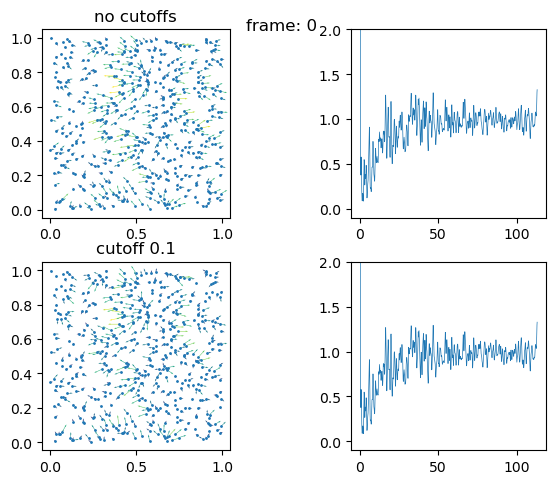

In [28]:
from matplotlib import animation


def load_gradient(path: str):
    xs, ys, us, vs, cs = [], [], [], [], []
    with open(path, 'r') as gradfile:
        for line in gradfile.readlines():
            x, y, u, v = line.split(" ")
            x = float(x)
            y = float(y)
            u = float(u)
            v = float(v)
            
            xs.append(x)
            ys.append(y)
            us.append(u)
            vs.append(v)
            cs.append(np.hypot(u,v))
    
    return (xs, ys, us, vs, cs)
            

fig, ax = plt.subplots(2,2)
fig.tight_layout()

ax[0][0].set_xlim([-0.1, 1.1])
ax[0][0].set_ylim([-0.1, 1.1])
ax[1][0].set_xlim([-0.1, 1.1])
ax[1][0].set_ylim([-0.1, 1.1])

def update(frame):
    fig.suptitle(f'frame: {str(frame)}')

    for axis in ax:
        for a in axis:
            a.clear()
    
    ax[0][0].set_title('no cutoffs')

    
    (xs, ys, us, vs, cs) = load_gradient(f'../result_data/gradients_no_cutoff/forces_{str(min(222,frame))}.txt')
    ax[0][0].quiver(xs, ys, us, vs, cs)
    ax[0][0].scatter(xs, ys, s=1.0)
    ax[0][0].set_aspect(1.0)

    (radspec_x, radspec_y) = load_heck_pcf(f'../result_data/gradients_no_cutoff/pointset_{str(min(222,frame))}_rp.txt')
    radspec_y = scipy.ndimage.gaussian_filter(radspec_y, 2.0)
    ax[0][1].plot(radspec_x, radspec_y, linewidth=0.5)
    ax[0][1].set_ylim([-0.1, 2.0])
    ax[0][1].set_aspect(57)


    ax[1][0].set_title('cutoff 0.1')
    (xs, ys, us, vs, cs) = load_gradient(f'../result_data/gradients_cutoff_0.1/forces_{str(frame)}.txt')
    ax[1][0].quiver(xs, ys, us, vs, cs)
    ax[1][0].scatter(xs, ys, s=1.0)
    ax[1][0].set_aspect(1.0)

    (radspec_x, radspec_y) = load_heck_pcf(f'../result_data/gradients_cutoff_0.1/pointset_{str(frame)}_rp.txt')
    radspec_y = scipy.ndimage.gaussian_filter(radspec_y, 2.0)
    ax[1][1].plot(radspec_x, radspec_y, linewidth=0.5)
    ax[1][1].set_ylim([-0.1, 2.0])
    ax[1][1].set_aspect(57)
    
anim = animation.FuncAnimation(fig=fig, func=update, frames=258, interval=200)
anim.save("animation_gradients_combined.mp4", dpi=600, writer="ffmpeg")

In [47]:
def convert_to_pointset(path: str):
    xs, ys = [], []
    with open(path, 'r') as gradfile:
        for line in gradfile.readlines():
            x, y, _, _= line.split(" ")
            x = float(x)
            y = float(y)

            
            xs.append(x)
            ys.append(y)

    with open(path.replace('.txt', '') + '_pointset.txt', 'w') as pointsetfile:
        for i in range(len(xs)):
            pointsetfile.write(str(xs[i]) + " " + str(ys[i]) + "\n")

for i in range(222,223):
    print(f'converting file {i}')
    #convert_to_pointset(f'../result_data/gradients_no_cutoff/forces_{i}.txt')
    os.system('../psa/cmake-build-debug/psa --rp --raw ' + f'../result_data/avggrads_no_cutoff/pointset_{str(i)}.txt')
    os.system('mv ' + f'./pointset_{str(i)}_rp.txt' + ' ' + f'../result_data/avggrads_no_cutoff/')
    

converting file 222
Config file 'psa.cfg' not found. Using defaults.


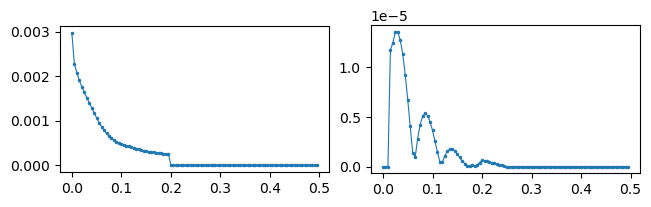

In [57]:
def load_histogram(path: str) -> [([float], [float])]:
    contributions = []
    with open(path, 'r') as histfile:
        for line in histfile.readlines():
            if ' ' in line:
                dist, force = line.split(' ')
                contributions[-1][0].append(float(dist))
                contributions[-1][1].append(float(force))
            else:
                contributions.append(([], []))
    return contributions


def fold_histogram(histogram_data: [([float], [float])], nbins: int):
    binsize = 0.5 / nbins
    bins = [0.0] * nbins
    n_contribs = [1] * nbins
    
    for point_contrib in histogram_data:
        for i, dist in enumerate(point_contrib[0]):
            binidx = math.floor(dist / binsize)
            bins[binidx] += point_contrib[1][i]
            n_contribs[binidx] += 1

    for i in range(len(bins)):
        bins[i] = bins[i] / float(n_contribs[i])
    
    return bins

fig, ax = plt.subplots(1,2, layout="constrained")

DATAPATH = "/home/clara/repositorys/vk_raytracing_tutorial_KHR/utk_experiments/utk/cmake-build-debug/src/samplers"

def update(frame):
    hist = load_histogram(f'{DATAPATH}/contribution_histogram{frame}.hst')
    #pts = load_pointset(f'{DATAPATH}/pointset_{frame}.txt')
    #rps = load_heck_pcf(f'{DATAPATH}/pointset_{frame}_rp.txt')
    
    # ax[0].clear()
    # ax[0].scatter(pts[0], pts[1], s=0.5)
    # ax[0].set_aspect(1.0)

    # ax[1].clear()
    # rps_y = scipy.ndimage.gaussian_filter(rps[1], 2.0)
    # ax[1].plot(rps[0], rps_y, linewidth = 0.5)
    # ax[1].set_ylim([-0.1, 2.5])
    # ax[1].set_aspect(48)
    
    nbins = 100
    bins = fold_histogram(hist, nbins)

    ax[0].plot([(0.5 / nbins) * i for i in range(nbins)], bins, linestyle = "-", marker = 'o', markersize=1.5, linewidth=0.8)


hist_0 = load_histogram(f'{DATAPATH}/contribution_histogram0.hst')
hist_222 = load_histogram(f'{DATAPATH}/contribution_histogram222.hst')

# nbins = 100
# bins_0 = fold_histogram(hist_0, nbins)
# bins_222 = fold_histogram(hist_222, nbins)

# allhists = []
# for i in range(223):
#     hist = load_histogram(f'{DATAPATH}/contribution_histogram{i}.hst')
#     allhists.append(fold_histogram(hist, nbins))

# hist_max = np.max(allhists, axis=0)
# hist_min = np.min(allhists, axis=0)
# hist_median = np.median(allhists, axis=0)
# nbins = len(hist_median)
# xs = [(0.5 / nbins) * i for i in range(nbins)]

# with open('.mediancache.txt', 'w+') as medianfile:
#     for i, median in enumerate(hist_median):
#         medianfile.write(str(xs[i]) + " " + str(median) + "\n")

# with open('.mincache.txt', 'w+') as minfile:
#     for minval in hist_min:
#         minfile.write(str(minval) + "\n")

# hist_median = []
# xs = []
# with open('.mediancache.txt', 'r') as medianfile:
#     for line in medianfile.readlines():
#         hist_median.append(float(line.split(' ')[1]))
#         xs.append(float(line.split(' ')[0]))

# hist_max = []
# with open('.maxcache.txt', 'r') as maxfile:
#     for line in maxfile.readlines():
#         hist_max.append(float(line))

# hist_min = []
# with open('.mincache.txt', 'r') as minfile:
#     for line in minfile.readlines():
#         hist_min.append(float(line))

#ax.fill_between(xs, hist_max, hist_min, alpha=0.2)
nbins = 100
hist_0 = load_histogram(f'{DATAPATH}/contribution_histogram{0}.hst')
bins_0 = fold_histogram(hist_0, nbins)

ax[0].plot([(0.5 / nbins) * i for i in range(nbins)], bins_0, linestyle = "-", marker = 'o', markersize=1.5, linewidth=0.8)

hist_last = load_histogram(f'{DATAPATH}/contribution_histogram235.hst')
bins_last = fold_histogram(hist_last, nbins)

ax[1].plot([(0.5 / nbins) * i for i in range(nbins)], bins_last, linestyle = "-", marker = 'o', markersize=1.5, linewidth=0.8)

ax[0].set_aspect(90)
ax[1].set_aspect(20000)

# ax[0].set_xticks([0.0, 0.3, 0.5])
# ax[1].set_xticks([0.0, 0.3, 0.5])

    
#fig.tight_layout()

plt.savefig("/home/clara/repositorys/bachelor-thesis/thesis/media/avggrads_both_tc_0.2.png", dpi=600, bbox_inches='tight')

#anim = animation.FuncAnimation(fig=fig, func=update, frames=222, interval=400)
#anim.save("with_average_forces_no_cutoff_allforces.mp4", dpi=300, writer="ffmpeg")

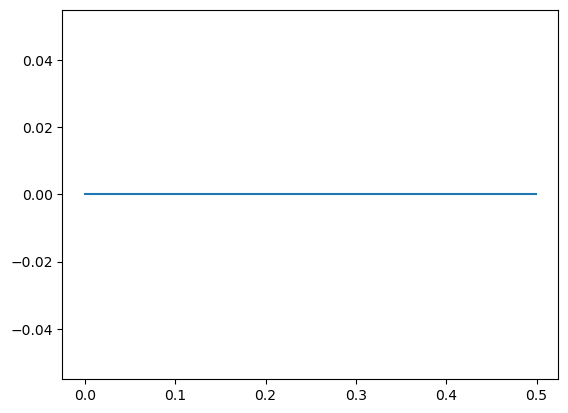

In [30]:
def load_curve(path: str):
    with open(path, 'r') as curvefile:
        xs, ys = [], []
        for line in curvefile.readlines():
            x,y = line.split(' ')
            xs.append(float(x))
            ys.append(float(y))
    return (xs, ys)

DATAPATH = '/home/clara/repositorys/vk_raytracing_tutorial_KHR/utk_experiments/utk/cmake-build-debug/src/samplers/tailcurves/'

def load_all_curves(path: str) -> [([float], [float])]:
    cutoffs = [float(name.split("_")[1].replace('.crv', '')) for name in os.listdir(path)]
    cutoffs = sorted(cutoffs)
    curves = []
    for cutoff in cutoffs:
        curves.append(load_curve(path + "/" + f'tailcurve_{str(cutoff)}.crv'))
        
    return curves 

fig, ax = plt.subplots(1,1)

allcurves = load_all_curves(DATAPATH)
def update(frame):
    ax.clear()
    ax.plot(allcurves[frame][0], allcurves[frame][1])

anim = animation.FuncAnimation(fig=fig, func=update, frames=len(allcurves), interval=200)
anim.save("all_tailcurves.mp4", dpi=200, writer="ffmpeg")

In [91]:
import subprocess

DATAPATH = '../result_data/cutoff_boxplots/pointsets_0.25'

with open(f'{DATAPATH}/oscillation.txt', 'w') as oscifile:
    for i in range(0, 100):
        print(f'\rcalculating oscillation {i}', end='')
        result = subprocess.check_output('../psa/cmake-build-debug/psa --spectral ' + f'{DATAPATH}/pointset_{i}.txt', shell=True, text=True)
        oscillation = result.split('\n')[2].split('\t')[-1]
        oscifile.write(str(oscillation) + '\n')


calculating oscillation 99

In [61]:
def load_oscillation(path: str) -> ([],[]):
    xs, ys = [], []
    with open(f'{path}/oscillation.txt', 'r') as oscillation_file:
        for line in oscillation_file.readlines():
            ys.append(float(line))

    return (range(len(ys)), ys)

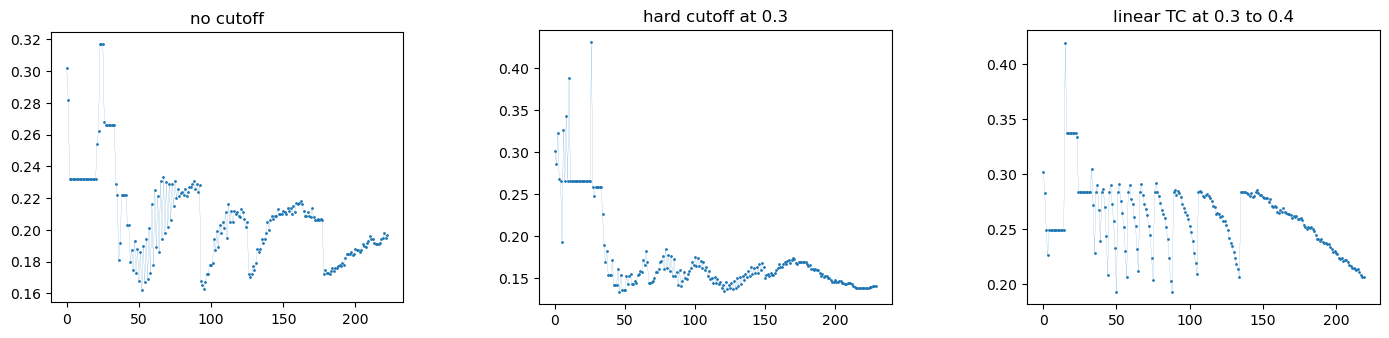

In [148]:
DATAPATH_NO_CO = '../result_data/avggrads_no_cutoff'
DATAPATH_HARD_CO = '../result_data/avggrads_cutoff_0.3'
DATAPATH_TAILCORRECT = '../result_data/avggrads_tailcorrect_lin_0.3'


oscillation_no_co = load_oscillation(DATAPATH_NO_CO)
oscillation_hard_co = load_oscillation(DATAPATH_HARD_CO)
oscillation_tc = load_oscillation(DATAPATH_TAILCORRECT)


fig, ax = plt.subplots(1,3)

fig.tight_layout()

fig.set_size_inches(15, 10.5, forward=True)

ax[0].set_aspect(1100.0)
ax[1].set_aspect(600.0)
ax[2].set_aspect(750.0)

ax[0].set_title("no cutoff")
ax[1].set_title("hard cutoff at 0.3")
ax[2].set_title("linear TC at 0.3 to 0.4")

ax[0].plot(oscillation_no_co[0], oscillation_no_co[1], marker = 'o', markersize= 1.0, linewidth = 0.1)
ax[1].plot(oscillation_hard_co[0], oscillation_hard_co[1], marker = 'o', markersize= 1.0, linewidth = 0.1)
ax[2].plot(oscillation_tc[0], oscillation_tc[1], marker = 'o', markersize= 1.0, linewidth = 0.1)

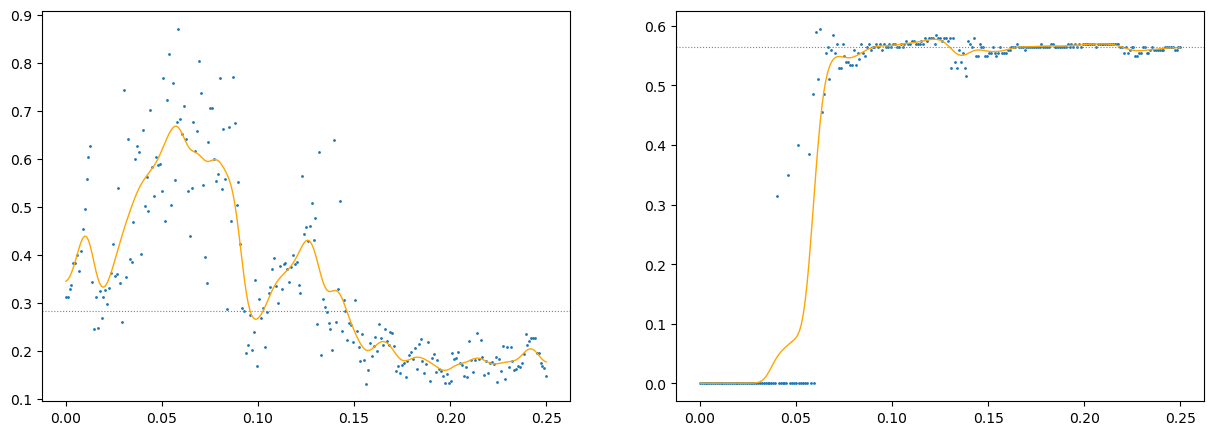

In [54]:
from scipy.ndimage import gaussian_filter, gaussian_filter1d


def load_oscillations(path: str):
    oscillations = []
    with open(path, 'r') as oscifile:
        for line in oscifile.readlines():
            r_c, osci = line.strip().split(' ')
            oscillations.append((float(r_c), float(osci)))
    return oscillations

def load_effnu(path: str):
    freqs = []
    with open(path, 'r') as freqfile:
        for line in freqfile.readlines():
            r_c, freq = line.strip().split(' ')
            freqs.append((float(r_c), float(freq)))
    return freqs

oscis = load_oscillations('/home/clara/repositorys/vk_raytracing_tutorial_KHR/utk_experiments/utk/cmake-build-debug/src/samplers/tailcorrected/oscillation.txt')
oscis = sorted(oscis, key=lambda x: x[0])

fig, ax = plt.subplots(1,2)

xs = [x[0] for x in oscis]
ys = [x[1] for x in oscis]
ax[0].plot(xs, ys, linestyle='None', marker='o', markersize =1)

smoothed = gaussian_filter1d(ys, 4)
ax[0].plot(xs, smoothed, linewidth=1.0, color='orange')
#ax[0].set_yticks([0.0, 0.1, np.median(ys), 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
#ax[0].set_xticks([0.0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5])
ax[0].axline((0, np.median(ys)), (0.25, np.median(ys)), color='gray', linestyle='dotted', linewidth=0.8)
#ax[0].axline((0.25, 0), (0.25, 0.2), color='gray', linestyle='dotted', linewidth=0.8)


freqs = load_effnu('/home/clara/repositorys/vk_raytracing_tutorial_KHR/utk_experiments/utk/cmake-build-debug/src/samplers/tailcorrected/effnu.txt')
freqs = sorted(freqs, key=lambda x: x[0])

xs = [x[0] for x in freqs]
ys = [x[1] for x in freqs]
ax[1].plot(xs, ys, linestyle='None', marker='o', markersize =1)

smoothed = gaussian_filter1d(ys, 4)
ax[1].plot(xs, smoothed, linewidth=1.0, color='orange')

ax[1].axline((0, np.median(ys)), (0.25, np.median(ys)), color='gray', linestyle='dotted', linewidth=0.8)
#ax[1].axline((0.25, 0), (0.25, 0.56), color='gray', linestyle='dotted', linewidth=0.8)
#ax[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, np.median(ys)])
#ax[1].set_xticks([0.0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5])

ax[0].set_aspect(0.25)
ax[1].set_aspect(0.31)

fig.set_size_inches(15, 15)

plt.savefig("/home/clara/repositorys/bachelor-thesis/thesis/media/cutoff_series_tailcorrection_combined.png", bbox_inches='tight', dpi=800)

In [54]:
def load_effnu(path: str) -> ([],[]):
    xs, ys = [], []
    with open(f'{path}/effnu.txt', 'r') as effnu_file:
        for line in effnu_file.readlines():
            ys.append(float(line))

    return (range(len(ys)), ys)

def load_oscillation(path: str) -> ([],[]):
    xs, ys = [], []
    with open(f'{path}/oscillation.txt', 'r') as effnu_file:
        for line in effnu_file.readlines():
            ys.append(float(line))

    return (range(len(ys)), ys)

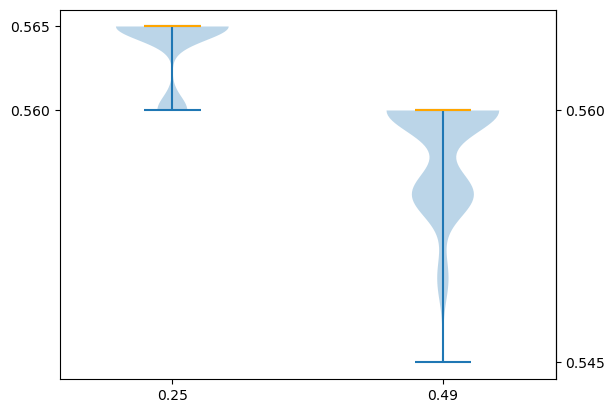

In [70]:
effnu_05 = load_effnu('../result_data/cutoff_boxplots/pointsets_0.5/')[1]
effnu_025 = load_effnu('../result_data/cutoff_boxplots/pointsets_0.25/')[1]
effnu_all = effnu_05 + effnu_025

fig, ax = plt.subplots(1,1)

plot = ax.violinplot([effnu_025, effnu_05], showmedians=True, positions=[0.25, 0.49], widths=[0.1, 0.1])
ax.set_xticks([0.25, 0.49])
plot['cmedians'].set_edgecolor('orange')

ax.set_yticks([max(effnu_025), min(effnu_025)])
ax.set_xlim([0.15, 0.59])

axr = ax.secondary_yaxis('right')
axr.set_yticks([np.median(effnu_05), min(effnu_05)])


# ax.axline((0, np.median(effnu_05)), (1, np.median(effnu_05)), linestyle='dashed', linewidth=0.3, color='gray')
# ax.axline((0, 0.555), (1, 0.555), linestyle='dashed', linewidth=0.3, color='gray')
# ax.axline((0, 0.545), (1, 0.545), linestyle='dashed', linewidth=0.3, color='gray')
# ax.axline((0, 0.565), (1, 0.565), linestyle='dashed', linewidth=0.3, color='gray')

plt.savefig('/home/clara/repositorys/bachelor-thesis/thesis/media/boxplots_cutoff_effnu.png', dpi=600, bbox_inches='tight')

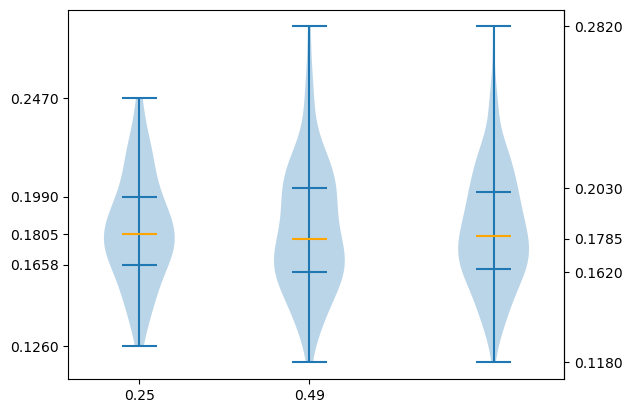

In [63]:
oscis_05 = load_oscillation('../result_data/cutoff_boxplots/pointsets_0.5/')[1]
oscis_025 = load_oscillation('../result_data/cutoff_boxplots/pointsets_0.25/')[1]
oscis_all = oscis_05 + oscis_025

fig, ax = plt.subplots(1,1)

plot = ax.violinplot([oscis_025, oscis_05, oscis_all], showmedians=True, positions=[0.25, 0.49, 0.75], widths=[0.1, 0.1, 0.1], quantiles=[[0.25, 0.75], [0.25, 0.75], [0.25, 0.75]])
ax.set_xticks([0.25, 0.49])
plot['cmedians'].set_edgecolor('orange')

ax.set_yticks([max(oscis_025), min(oscis_025), np.quantile(oscis_025, 0.25), np.quantile(oscis_025, 0.75), np.median(oscis_025)])
ax.set_xlim([0.15, 0.85])

axr = ax.secondary_yaxis('right')
axr.set_yticks([max(oscis_05), min(oscis_05), np.quantile(oscis_05, 0.25), np.quantile(oscis_05, 0.75), np.median(oscis_05)])


#ax.axline((0, np.median(effnu_05)), (1, np.median(effnu_05)), linestyle='dashed', linewidth=0.3, color='gray')
#ax.axline((0, 0.555), (1, 0.555), linestyle='dashed', linewidth=0.3, color='gray')
#ax.axline((0, 0.545), (1, 0.545), linestyle='dashed', linewidth=0.3, color='gray')
#ax.axline((0, 0.565), (1, 0.565), linestyle='dashed', linewidth=0.3, color='gray')

#plt.savefig('/home/clara/repositorys/bachelor-thesis/thesis/media/boxplots_cutoff_effnu.png', dpi=600, bbox_inches='tight')

In [60]:
import subprocess

DATAPATH = '/home/clara/repositorys/vk_raytracing_tutorial_KHR/utk_experiments/utk/cmake-build-debug/src/samplers/tc02'

with open(f'{DATAPATH}/effnu.txt', 'w') as freqfile:
    with open(f'{DATAPATH}/oscillation.txt', 'w') as oscifile:
        for file in os.listdir(DATAPATH):
            if file == 'oscillation.txt' or file == 'effnu.txt':
                continue
            cutoff = file.replace('pointset_', '').replace('.txt', '')
            
            print(f'\rcalculating effective nyquist frequency for cutoff {cutoff}', end='')
            result = subprocess.check_output('../psa/cmake-build-debug/psa --spectral ' + f'{DATAPATH}/pointset_{cutoff}.txt', shell=True, text=True)
            effnu = result.split('\n')[2].split('\t')[-2]
            oscillation = result.split('\n')[2].split('\t')[-1]
            freqfile.write(str(effnu) + '\n')
            oscifile.write(str(oscillation) + '\n')

calculating effective nyquist frequency for cutoff 93

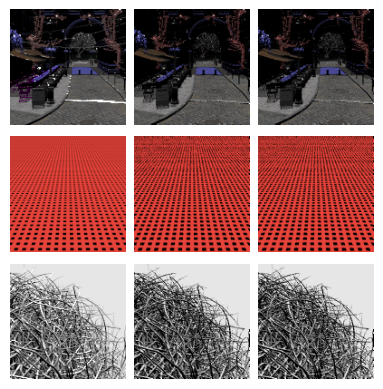

In [125]:
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage import data, img_as_float

#------------------------------------------------------------
bistro_ground_truth = mpimg.imread('../result_data/result_images/bistro/converged.png')[0:128, 0:128, 0:3]
bistro_no_cutoff = mpimg.imread('../result_data/result_images/bistro/no_cutoff/averaged.png')
bistro_cutoff_025 = mpimg.imread('../result_data/result_images/bistro/cutoff_025/averaged.png')

ssim_bistro_no_cutoff = ssim(bistro_ground_truth, bistro_no_cutoff, channel_axis=2, data_range=bistro_no_cutoff.max() - bistro_no_cutoff.min())
ssim_bistro_cutoff_025 = ssim(bistro_ground_truth, bistro_cutoff_025, channel_axis=2, data_range=bistro_cutoff_025.max() - bistro_cutoff_025.min())

mse_bistro_no_cutoff = mse(bistro_ground_truth, bistro_no_cutoff)
mse_bistro_cutoff_025 = mse(bistro_ground_truth, bistro_cutoff_025)

psnr_bistro_no_cutoff = psnr(bistro_ground_truth, bistro_no_cutoff)
psnr_bistro_cutoff_025 = psnr(bistro_ground_truth, bistro_cutoff_025)
#------------------------------------------------------------
grid_ground_truth = mpimg.imread('../result_data/result_images/grid/converged.png')[0:128, 0:128, 0:3]
grid_no_cutoff = mpimg.imread('../result_data/result_images/grid/no_cutoff/128/averaged.png')
grid_cutoff_025 = mpimg.imread('../result_data/result_images/grid/cutoff_025/128/averaged.png')

ssim_grid_no_cutoff = ssim(grid_ground_truth, grid_no_cutoff, channel_axis=2, data_range=grid_no_cutoff.max() - grid_no_cutoff.min())
ssim_grid_cutoff_025 = ssim(grid_ground_truth, grid_cutoff_025, channel_axis=2, data_range=grid_cutoff_025.max() - grid_cutoff_025.min())

mse_grid_no_cutoff = mse(grid_ground_truth, grid_no_cutoff)
mse_grid_cutoff_025 = mse(grid_ground_truth, grid_cutoff_025)

psnr_grid_no_cutoff = psnr(grid_ground_truth, grid_no_cutoff)
psnr_grid_cutoff_025 = psnr(grid_ground_truth, grid_cutoff_025)
#------------------------------------------------------------
hairball_ground_truth = mpimg.imread('../result_data/result_images/hairball/converged.png')[0:128, 0:128, 0:3]
hairball_no_cutoff = mpimg.imread('../result_data/result_images/hairball/no_cutoff/128/averaged.png')
hairball_cutoff_025 = mpimg.imread('../result_data/result_images/hairball/cutoff_025/128/averaged.png')

ssim_hairball_no_cutoff = ssim(hairball_ground_truth, hairball_no_cutoff, channel_axis=2, data_range=hairball_no_cutoff.max() - hairball_no_cutoff.min())
ssim_hairball_cutoff_025 = ssim(hairball_ground_truth, hairball_cutoff_025, channel_axis=2, data_range=hairball_cutoff_025.max() - hairball_cutoff_025.min())

mse_hairball_no_cutoff = mse(hairball_ground_truth, hairball_no_cutoff)
mse_hairball_cutoff_025 = mse(hairball_ground_truth, hairball_cutoff_025)

psnr_hairball_no_cutoff = psnr(hairball_ground_truth, hairball_no_cutoff)
psnr_hairball_cutoff_025 = psnr(hairball_ground_truth, hairball_cutoff_025)
#------------------------------------------------------------

fig, ax = plt.subplots(3,3, gridspec_kw = {'wspace':-0.5, 'hspace':0.1})#, constrained_layout=True)
#plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 8})

for axis in ax:
    for item in axis:
        item.set_axis_off()

# ground truth (converged render)
ax[0, 0].imshow(bistro_ground_truth)
ax[1, 0].imshow(grid_ground_truth)
ax[2, 0].imshow(hairball_ground_truth)

# blue noise wo cutoff
ax[0, 1].imshow(bistro_no_cutoff)
#ax[0, 1].set_title(f'SSIM: {ssim_bistro_no_cutoff:.4f}\n MSE: {mse_bistro_no_cutoff:.4f}\n PSNR: {psnr_bistro_no_cutoff:.4f}')
ax[1, 1].imshow(grid_no_cutoff)
#ax[1, 1].set_title(f'SSIM: {ssim_grid_no_cutoff:.4f}\n MSE: {mse_grid_no_cutoff:.4f}\n PSNR: {psnr_grid_no_cutoff:.4f}')
ax[2, 1].imshow(hairball_no_cutoff)
#ax[2, 1].set_title(f'SSIM: {ssim_hairball_no_cutoff:.4f}\n MSE: {mse_hairball_no_cutoff:.4f}\n PSNR: {psnr_hairball_no_cutoff:.4f}')


# blue noise with cutoff
ax[0, 2].imshow(bistro_cutoff_025)
#ax[0, 2].set_title(f'SSIM: {ssim_bistro_cutoff_025:.4f}\n MSE: {mse_bistro_cutoff_025:.4f}\n PSNR: {psnr_bistro_cutoff_025:.4f}')
ax[1, 2].imshow(grid_cutoff_025)
#ax[1, 2].set_title(f'SSIM: {ssim_grid_cutoff_025:.4f}\n MSE: {mse_grid_cutoff_025:.4f}\n PSNR: {psnr_grid_cutoff_025:.4f}')
ax[2, 2].imshow(hairball_cutoff_025)
#ax[2, 2].set_title(f'SSIM: {ssim_hairball_cutoff_025:.4f}\n MSE: {mse_hairball_cutoff_025:.4f}\n PSNR: {psnr_hairball_cutoff_025:.4f}')


plt.savefig("/home/clara/repositorys/bachelor-thesis/thesis/media/cutoff_spatial_comparison.png", dpi=600, bbox_inches='tight')                

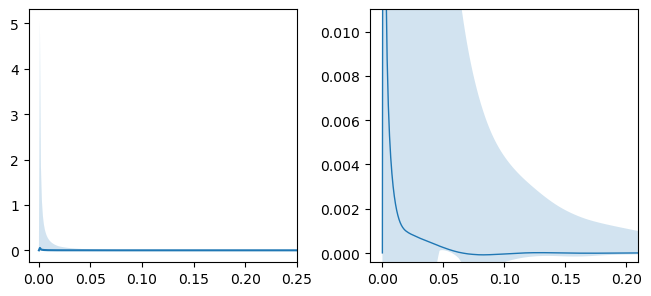

In [106]:
def load_all_forces(path: str, startidx: int, endidx: int) -> [[float]]:
    allforces = []
    for i in range(startidx, endidx + 1):
        force_i = []
        with open(f"{path}/force{i}.dat", 'r') as forcefile:
            for line in forcefile.readlines():
                force_i.append(float(line.strip().split(' ')[1]))
        allforces.append(force_i)
    return allforces

def xs_from_forcefile(path: str) -> [float]:
    xs = []
    with open(f"{path}/force0.dat", 'r') as forcefile:
        for line in forcefile.readlines():
            xs.append(float(line.split(' ')[0]))
    return xs

force_matrix = load_all_forces('/home/clara/repositorys/vk_raytracing_tutorial_KHR/utk_experiments/utk/cmake-build-debug/src/samplers', 0, 217)
xs = xs_from_forcefile('/home/clara/repositorys/vk_raytracing_tutorial_KHR/utk_experiments/utk/cmake-build-debug/src/samplers')

max_curve = np.max(force_matrix, axis=0)
min_curve = np.min(force_matrix, axis=0)
median_curve = np.median(force_matrix, axis=0)

fig, ax = plt.subplots(1,2, layout="constrained")

ax[0].fill_between(xs, max_curve, min_curve, alpha=0.2)
ax[0].plot(xs, median_curve)
ax[0].set_xlim([-0.01, 0.25])

ax[1].fill_between(xs, max_curve, min_curve, alpha=0.2)
ax[1].plot(xs, median_curve, linewidth=1.0)
ax[1].set_xlim([-0.01, 0.21])
ax[1].set_ylim([-0.0004, 0.011])

ax[0].set_aspect(0.22/5)
ax[1].set_aspect(0.22/0.0121)

#plt.savefig('/home/clara/repositorys/bachelor-thesis/thesis/media/force_range_illustration.png', dpi=600, bbox_inches='tight')


[Text(1, 0, 'tailcorrected\n r_c=0.2, r_e=0.5'),
 Text(2, 0, 'cutoff\n r_c=0.2'),
 Text(3, 0, 'cutoff\n r_c=0.5')]

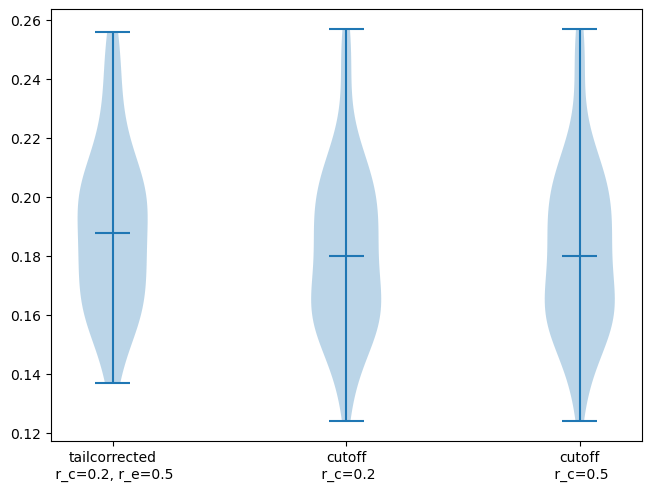

In [87]:
oscis_gt = load_oscillation('/home/clara/repositorys/vk_raytracing_tutorial_KHR/utk_experiments/utk/cmake-build-debug/src/samplers/ground_truth')[1]
oscis_tc02 = load_oscillation('/home/clara/repositorys/vk_raytracing_tutorial_KHR/utk_experiments/utk/cmake-build-debug/src/samplers/tc02')[1]
oscis_cutoff = load_oscillation('/home/clara/repositorys/vk_raytracing_tutorial_KHR/utk_experiments/utk/cmake-build-debug/src/samplers/cutoff02')[1]

fig, ax = plt.subplots(1,1, layout='constrained')

ax.violinplot([oscis_tc02, oscis_cutoff, oscis_gt], 
              showmedians=True,
              positions=[1, 2, 3],
              widths=[0.3, 0.3, 0.3],
              quantiles=[[0.25, 0.75], [0.25, 0.75], [0.25, 0.75]])
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['tailcorrected\n r_c=0.2, r_e=0.5', 'cutoff\n r_c=0.2', 'cutoff\n r_c=0.5'])
